#PROGRAM 1



> Classifying types of flowers: Multiclass classification: Iris dataset



In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Iris data
iris = load_iris()
X, y = iris.data, iris.target
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3625 - loss: 1.3204 - val_accuracy: 0.3667 - val_loss: 1.1419
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3769 - loss: 1.0768 - val_accuracy: 0.3667 - val_loss: 1.0018
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3554 - loss: 0.9983 - val_accuracy: 0.7667 - val_loss: 0.9574
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8344 - loss: 0.9520 - val_accuracy: 0.9000 - val_loss: 0.9126
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9573 - loss: 0.8979 - val_accuracy: 0.9000 - val_loss: 0.8435
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8410 - loss: 0.8363 - val_accuracy: 0.7000 - val_loss: 0.7825
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6540 - loss: 0.7840 - val_accuracy: 0.7000 - val_loss: 0.7385
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6348 - loss: 0.7649 - val_accuracy: 0.8000 - val_loss: 0.6989


In [ ]:
import numpy as np
# After training
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Display a few predictions
for i in range(10):
    print(f"Predicted: {iris.target_names[predicted_classes[i]]}, Actual: {iris.target_names[actual_classes[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor


#PROGRAM 2

> Classifying movie reviews: Binary classification: IMDB dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Build model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=200),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6846 - loss: 0.5719 - val_accuracy: 0.8447 - val_loss: 0.3403
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8966 - loss: 0.2580 - val_accuracy: 0.8698 - val_loss: 0.3054
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9190 - loss: 0.2052 - val_accuracy: 0.8751 - val_loss: 0.2985
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9371 - loss: 0.1740 - val_accuracy: 0.8356 - val_loss: 0.4231
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9442 - loss: 0.1508 - val_accuracy: 0.8550 - val_loss: 0.3617
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9533 - loss: 0.1319 - val_accuracy: 0.8616 - val_loss: 0.3732
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9582 - loss: 0.1248 - val_accuracy: 0.8223 - val_loss: 0.4884
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9607 - loss: 0.1123 - val_accuracy: 0.8299 - 

In [ ]:
import numpy as np

# Assuming 'word_index' is already defined (from imdb.get_word_index())
index_word = {value: key for key, value in word_index.items()}

def decode_review(text_ids):
    return " ".join([index_word.get(i - 3, "?") for i in text_ids if i >= 3]) # offset by 3 because 0, 1, 2 are reserved indices for padding, start of sequence, and unknown.


predictions = model2.predict(X_test)  # Predict directly on X_test

# Display predictions for a few examples (e.g., first 5)
for i in range(10):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    review_text = decode_review(X_test[i])  # Decode the review text
    print(f"Review (index {i}): {review_text}")
    print(f"Sentiment: {sentiment}")
    print("-" * 50)  # Separator for better readability

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Review (index 0): please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss
Sentiment: Negative
--------------------------------------------------
Review (index 1): psychological it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the moody set fits the content of the st

#PROGRAM 3

> Classifying newswires : a multiclass classification: Reuters dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load Reuters dataset
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=200),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3402 - loss: 2.7612 - val_accuracy: 0.4831 - val_loss: 2.0758
Epoch 2/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4882 - loss: 1.9967 - val_accuracy: 0.5401 - val_loss: 1.8242
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5775 - loss: 1.7048 - val_accuracy: 0.6215 - val_loss: 1.6316
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6382 - loss: 1.5489 - val_accuracy: 0.6434 - val_loss: 1.5185
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6669 - loss: 1.3848 - val_accuracy: 0.6683 - val_loss: 1.3879
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6994 - loss: 1.2357 - val_accuracy: 0.6839 - val_loss: 1.3135
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7245 - loss: 1.1186 - val_accuracy: 0.6897 - val_loss: 1.2601
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7369 - loss: 1.0477 - val_accuracy: 0.7012 - v

In [ ]:
import numpy as np
# After training
predictions = model3.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Display a few predictions
for i in range(5):
    print(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted: 3, Actual: 3
Predicted: 10, Actual: 10
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 13, Actual: 4


#PROGRAM 4

> Classifying handwritten digits: using CNN multiclass classification: MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# Build model
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model4.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9091 - loss: 0.3003 - val_accuracy: 0.9792 - val_loss: 0.0624
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9865 - loss: 0.0436 - val_accuracy: 0.9883 - val_loss: 0.0345
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9910 - loss: 0.0284 - val_accuracy: 0.9903 - val_loss: 0.0297
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9902 - val_loss: 0.0341
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9948 - loss: 0.0140 - val_accuracy: 0.9897 - val_loss: 0.0329


In [ ]:
# After training
sample_images = X_test[:5]
predictions = model4.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display predictions
for i in range(5):
    print(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4


#PROGRAM 5

> Classifying images using CNN: cats and dogs dataset

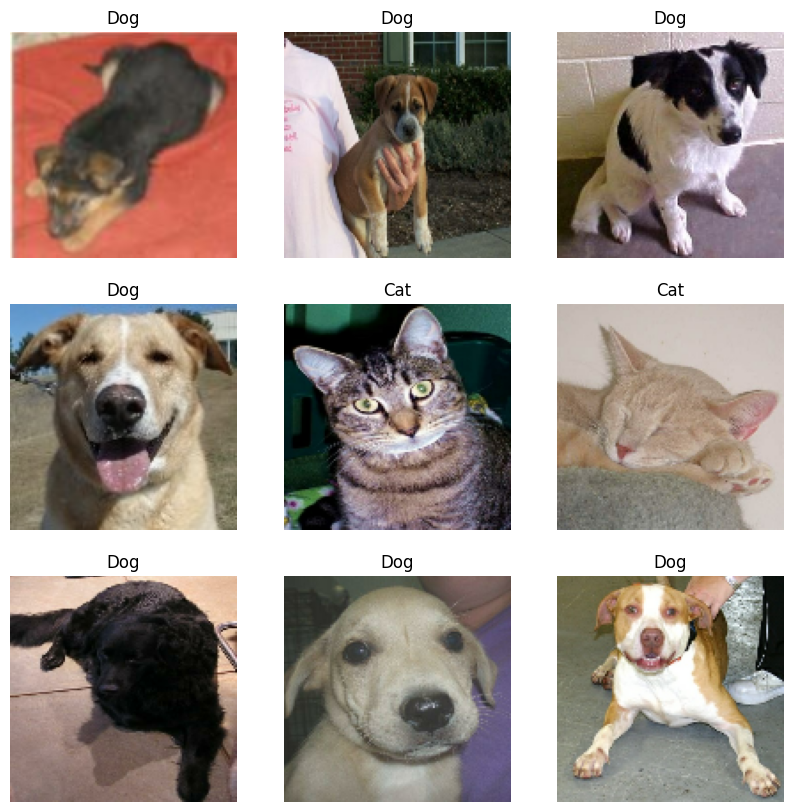

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 718s 1s/step - accuracy: 0.5739 - loss: 0.7267 - val_accuracy: 0.7173 - val_loss: 0.5533
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 717s 1s/step - accuracy: 0.7260 - loss: 0.5336 - val_accuracy: 0.8001 - val_loss: 0.4308
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.8006 - loss: 0.4249 - val_accuracy: 0.8052 - val_loss: 0.4158


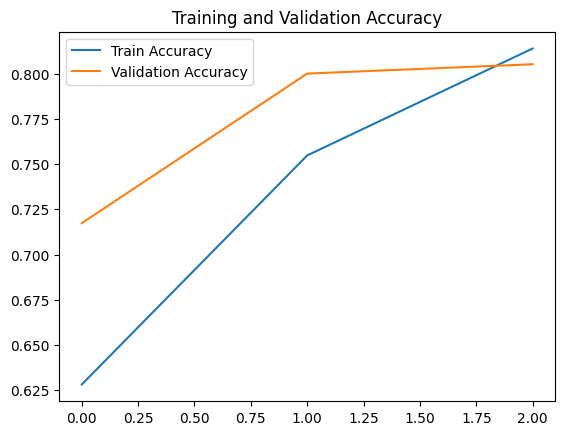

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


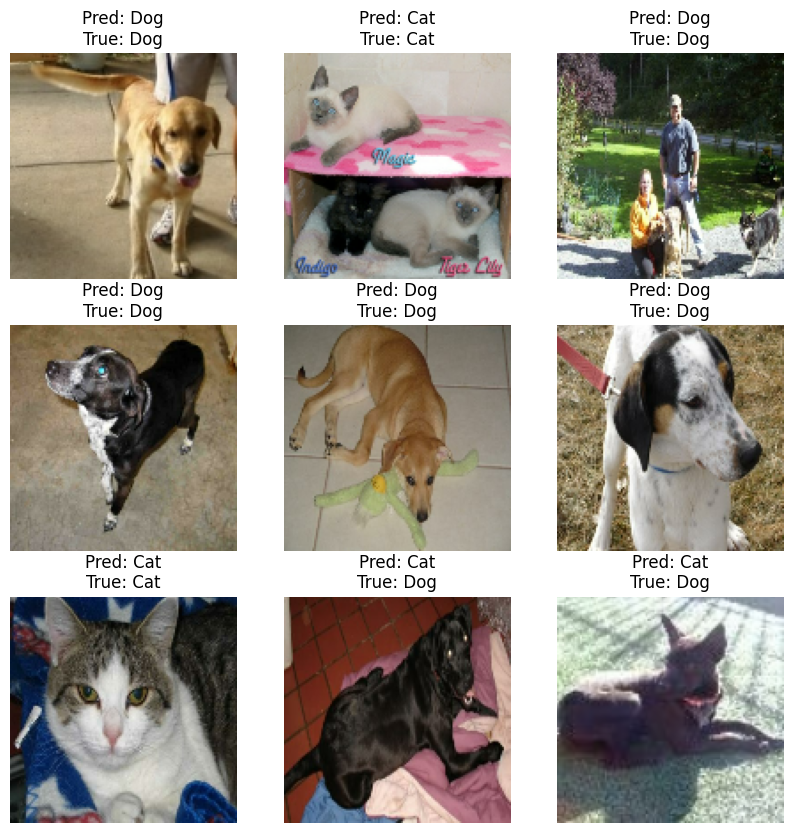

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the dataset
(dataset_train, dataset_test), dataset_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],  # 80% train, 20% test split
    as_supervised=True,  # Includes labels
    with_info=True
)

# Function to preprocess the dataset
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize images to 128x128
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Preprocess train and test datasets
batch_size = 32
train_data = dataset_train.map(preprocess).shuffle(1000).batch(batch_size).prefetch(1)
test_data = dataset_test.map(preprocess).batch(batch_size).prefetch(1)

# Visualize some examples
for image, label in train_data.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i])
        plt.title("Cat" if label[i].numpy() == 0 else "Dog")
        plt.axis("off")
    plt.show()

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=3, validation_data=test_data)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Make predictions on test data
sample_test_images, sample_test_labels = next(iter(test_data.take(1)))
predictions = model.predict(sample_test_images)

# Display predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_test_images[i])
    pred_label = "Dog" if predictions[i] > 0.5 else "Cat"
    true_label = "Dog" if sample_test_labels[i].numpy() == 1 else "Cat"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.show()


#PROGRAM 6

> Sentiment analysis using Recurrent neural network: IMDb movie reviews.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Build model
model6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=200),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model6.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 147ms/step - accuracy: 0.7152 - loss: 0.5275 - val_accuracy: 0.8595 - val_loss: 0.3404
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 141ms/step - accuracy: 0.8836 - loss: 0.2971 - val_accuracy: 0.8369 - val_loss: 0.3741
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 167ms/step - accuracy: 0.9146 - loss: 0.2226 - val_accuracy: 0.8540 - val_loss: 0.3620
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 147ms/step - accuracy: 0.9402 - loss: 0.1706 - val_accuracy: 0.8616 - val_loss: 0.3377
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 143ms/step - accuracy: 0.9574 - loss: 0.1250 - val_accuracy: 0.8549 - val_loss: 0.3823


In [ ]:
predictions = model6.predict(X_test)  # Predict directly on X_test

import numpy as np

# Assuming 'word_index' is already defined (from imdb.get_word_index())
index_word = {value: key for key, value in word_index.items()}

def decode_review(text_ids):
    return " ".join([index_word.get(i - 3, "?") for i in text_ids if i >= 3]) # offset by 3 because 0, 1, 2 are reserved indices for padding, start of sequence, and unknown.

# Display predictions for a few examples (e.g., first 5)
for i in range(5):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    review_text = decode_review(X_test[i])  # Decode the review text
    print(f"Review (index {i}): {review_text}")
    print(f"Sentiment: {sentiment}")
    print("-" * 50)  # Separator for better readability

Review (index 0): please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss
Sentiment: Negative
--------------------------------------------------
Review (index 1): psychological it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the moody set fits the content of the story very well in short this movie is a po